<br>
<br>

# `# Bagging Code Example:`

**With Irish Dataset:**

<br>
<br>


In [76]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [77]:



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, names=column_names)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:

# label encoding for target SPECIES columns: 
labelEncoder = LabelEncoder()
df["species"] = labelEncoder.fit_transform(df["species"])


In [79]:

# classes: 

# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica
labelEncoder.classes_


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [80]:

df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,1
24,4.8,3.4,1.9,0.2,0


<br>

### `For making this problem hrader we only word with: 1,2:`

<br>

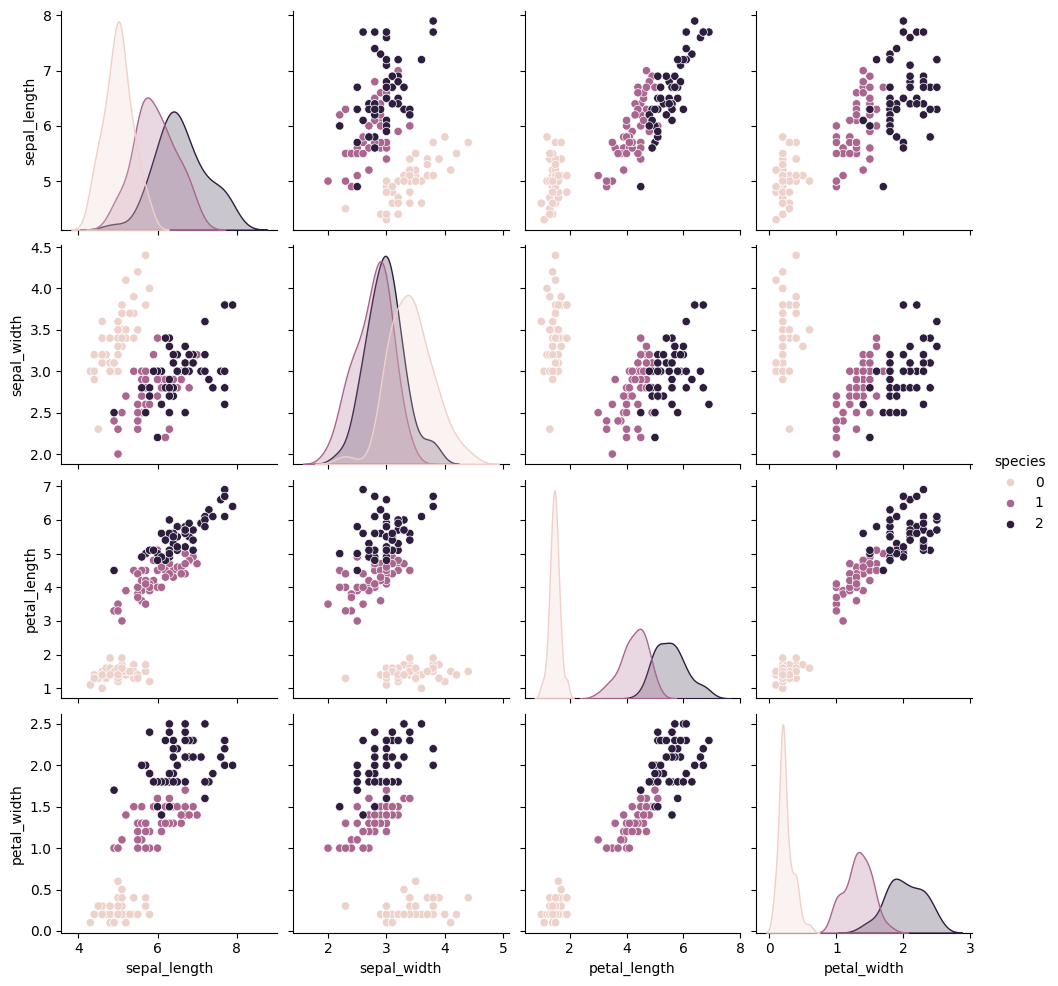

In [81]:

sns.pairplot(data=df,hue="species")

In [82]:

# remove one class and make it classification problem:
new_df = df[df['species'] !=0] [['sepal_width','sepal_length','species']]
new_df


,sepal_width,sepal_length,species
50,3.2,7.0,1
51,3.2,6.4,1
52,3.1,6.9,1
53,2.3,5.5,1
54,2.8,6.5,1
...,...,...,...
145,3.0,6.7,2
146,2.5,6.3,2
147,3.0,6.5,2
148,3.4,6.2,2


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

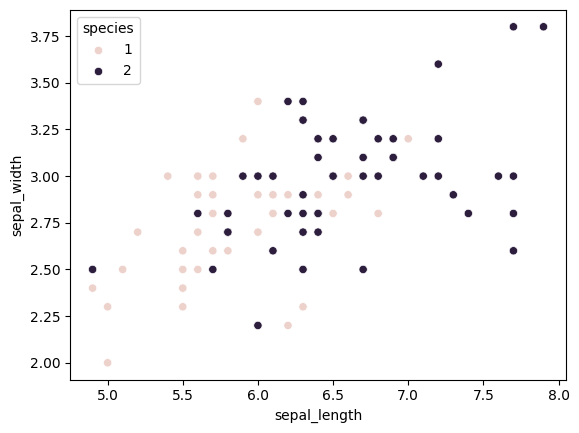

In [83]:


sns.scatterplot(data=new_df,x='sepal_length',y='sepal_width',hue='species')


<br>
<br>

#  `# Boostraping part:`

<br>
<br>

In [84]:

# we have 1st 50 label: 1 and last 50 rows label: 2
# So, we need to shuffle the data: 
new_df


,sepal_width,sepal_length,species
50,3.2,7.0,1
51,3.2,6.4,1
52,3.1,6.9,1
53,2.3,5.5,1
54,2.8,6.5,1
...,...,...,...
145,3.0,6.7,2
146,2.5,6.3,2
147,3.0,6.5,2
148,3.4,6.2,2


In [85]:

# shuffle the data
new_df = new_df.sample(100)

# unique value for train,test and validated the model: 
df_train = new_df.iloc[:60,:].sample(10)
df_val = new_df.iloc[60:80,:].sample(5)
df_test = new_df.iloc[80:,:].sample(5)


In [86]:
df_val

,sepal_width,sepal_length,species
140,3.1,6.7,2
64,2.9,5.6,1
143,3.2,6.8,2
88,3.0,5.6,1
98,2.5,5.1,1


In [87]:

X_test = df_val.iloc[:,:2]
y_test = df_val.iloc[:,2:]
X_test

,sepal_width,sepal_length
140,3.1,6.7
64,2.9,5.6
143,3.2,6.8
88,3.0,5.6
98,2.5,5.1


<br>
<br>

# `# Bagging **case: 01** Row sampling (with replacement)`

- we will train 3 decision tress from tranning data.
- we will choose 8 rows from with replaement means we have in total 10 rows. From that, we will choose 8 rows.There they will contain duplicate value.

<br>
<br>

In [88]:

# for 1st dT
df_bag = df_train.sample(n=8,replace=True)
X = df_bag.iloc[:,:2]
y = df_bag.iloc[:,2:]


In [89]:
#verify the duplicated data 
df_bag

,sepal_width,sepal_length,species
119,2.2,6.0,2
53,2.3,5.5,1
119,2.2,6.0,2
53,2.3,5.5,1
53,2.3,5.5,1
53,2.3,5.5,1
109,3.6,7.2,2
57,2.4,4.9,1


In [90]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [91]:
y.values.reshape(8).shape

(8,)

In [92]:

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(decision_tree=clf)
    plt.show()
    plot_decision_regions(X.values,y.values.reshape(8),clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

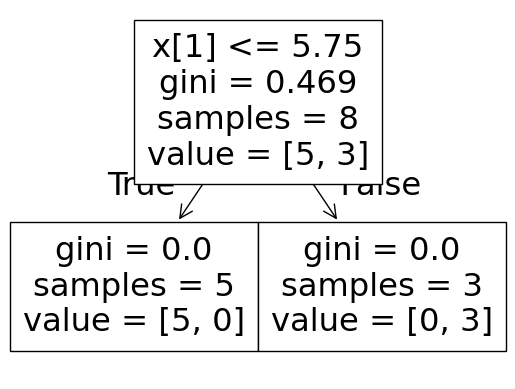

/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


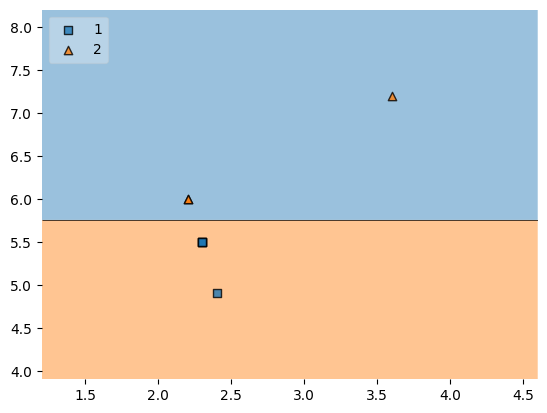

In [93]:

DT1 = DecisionTreeClassifier()
evaluate(DT1,X,y)

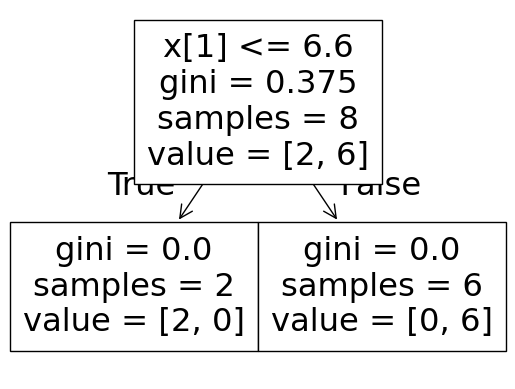

/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


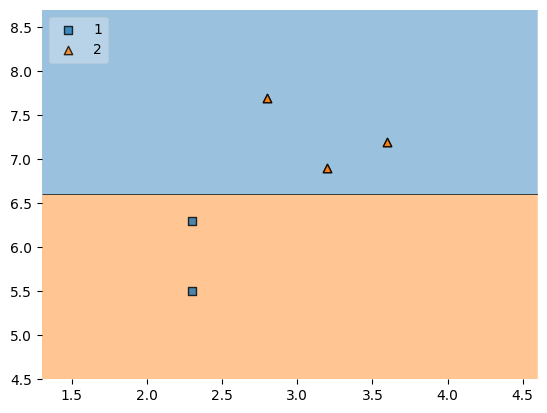

In [94]:

# for 2nd dT
df_bag = df_train.sample(n=8,replace=True)
X = df_bag.iloc[:,:2]
y = df_bag.iloc[:,2:]


DT2 = DecisionTreeClassifier()
evaluate(DT2,X,y)


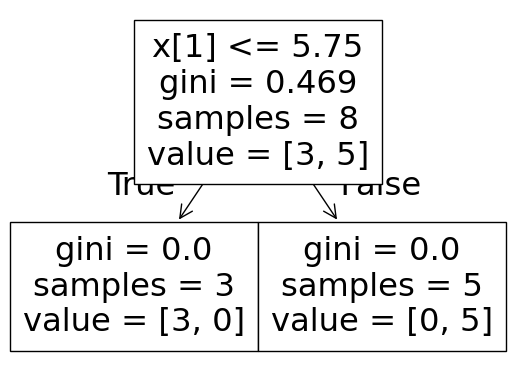

/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


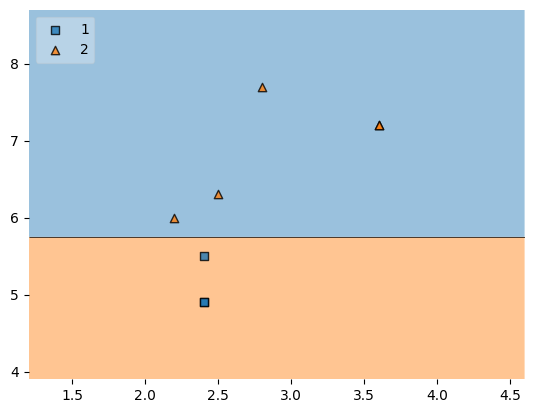

In [95]:


# for 3rd dT
df_bag = df_train.sample(n=8,replace=True)
X = df_bag.iloc[:,:2]
y = df_bag.iloc[:,2:]


DT3 = DecisionTreeClassifier()
evaluate(DT3,X,y)


<br>
<br>

# `#prediction with df_test:`

<br>
<br>

In [96]:

df_test


,sepal_width,sepal_length,species
96,2.9,5.7,1
55,2.8,5.7,1
128,2.8,6.4,2
126,2.8,6.2,2
141,3.1,6.9,2


In [97]:

print(f"predictor01: {DT1.predict(np.array([2.9 ,6.3]).reshape(1,2))}")
print(f"predictor02: {DT2.predict(np.array([2.9 ,6.3]).reshape(1,2))}")
print(f"predictor03: {DT3.predict(np.array([2.9 ,6.3]).reshape(1,2))}")


predictor01: [2]
predictor02: [1]
predictor03: [2]


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [98]:

print(f"predictor01: {DT1.predict(np.array([2.8 ,5.7]).reshape(1,2))}")
print(f"predictor02: {DT2.predict(np.array([2.8 ,5.7]).reshape(1,2))}")
print(f"predictor03: {DT3.predict(np.array([2.8 ,5.7]).reshape(1,2))}")

predictor01: [1]
predictor02: [1]
predictor03: [1]


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<br>
<br>

# `# Row Sampling: without no replacement, **PASTING**`

<br>
<br>


In [ ]:

# same as row sampling with replacement: without this line: 
df_train.sample(replace=False)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 120 to 109
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_width   10 non-null     float64
 1   sepal_length  10 non-null     float64
 2   species       10 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


<br>
<br>

# `#Random Subspaces:`


**We do column sampling in random subspaces.**

<br>
<br>


In [102]:



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, names=column_names)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:

df.sample(n=2,replace=True,axis=1)


,species,sepal_length
0,Iris-setosa,5.1
1,Iris-setosa,4.9
2,Iris-setosa,4.7
3,Iris-setosa,4.6
4,Iris-setosa,5.0
...,...,...
145,Iris-virginica,6.7
146,Iris-virginica,6.3
147,Iris-virginica,6.5
148,Iris-virginica,6.2


<br>
<br>

# `#Random Patches:`


**We do both row and column sampling:**

<br>
<br>


In [108]:





url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, names=column_names)


# row sample + column sample
df.sample(n=8,replace=True).sample(n=2,replace=True,axis=1)


,sepal_width,petal_width
48,3.7,0.2
99,2.8,1.3
4,3.6,0.2
97,2.9,1.3
115,3.2,2.3
45,3.0,0.3
20,3.4,0.2
13,3.0,0.1
